#### Calculation of the probability that the pip of a "normal" dice becomes "1" more than or equal to 25 times out of 100 casts  
普通のサイコロを100回振ったときに1の目が25回以上出る確率を計算するプログラム  

$$
p = \sum_{n=25}^{100} {}_{100} C_n \times \left(\frac{1}{6}\right)^n \left(\frac{5}{6}\right)^{100-n}
$$

#### Program 1  
Straightforward calculation  

In [1]:
def fact(x):
    ret = 1
    for i in range(1, x+1):
        ret *= i
    return ret

def comb(a, b):
    return fact(a) / fact(b) / fact(a-b)

p = 0.0
for n in range(25, 101):
    p1 = comb(100, n) * ((1/6)**n) * ((5/6)**(100-n))
    p += p1

print(p)

0.021703378733936077


#### Program 2
Use scipy.special.comb() for calculation of combination

In [2]:
from scipy.special import comb

p = 0.0
for n in range(25, 101):
    p1 = comb(100, n) * ((1/6)**n) * ((5/6)**(100-n))
    p += p1

print(p)

0.02170337873393607


#### Program 3
Obtain p-value from binomial distribution directly

In [3]:
import scipy.stats as ss

p_value = ss.binom_test(25, 100, p=1/6, alternative='greater')
print(p_value)

0.02170337873393608


#### Program 4  
By simulation using random numbers from binomial distribution  

In [4]:
import numpy as np
import scipy.stats as ss

a = ss.binom.rvs(100, 1/6, size=10000)
p = np.sum( a >= 25 ) / 10000
print('p =', p)

p = 0.0226


#### Program 5 (Adv)  
Visualization of convergence of calculated p-value  

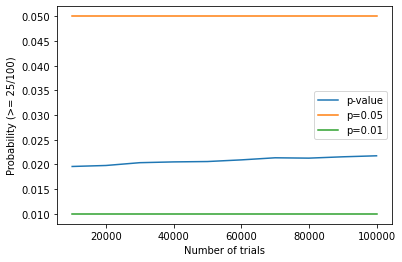

0.02176


In [5]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

x, y = [], []
N, iter = 10000, 10
num_over_25, num_all = 0, 0
for i in range(iter):
    a = ss.binom.rvs(100, 1/6, size=N)
    num_over_25 += np.sum( a >= 25 )
    num_all += N
    p = num_over_25 / num_all
    x.append(num_all)
    y.append(p)
plt.plot(x, y, label='p-value')
plt.xlabel('Number of trials')
plt.ylabel('Probability (>= 25/100)')
plt.plot([min(x),max(x)], [0.05,0.05], label='p=0.05')
plt.plot([min(x),max(x)], [0.01,0.01], label='p=0.01')
plt.legend()
plt.show()
print(y[iter-1])